In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
import datetime
import pytz

from IPython import display
from IPython.display import Image

In [2]:
#reading dataset
solar_energy = pd.read_csv("solar_dataset.csv", parse_dates=['Time'], date_parser=lambda col: pd.to_datetime(col, utc=True),)
solar_energy.head()

,Time,Slr1W_Avg,Slr1MJ_Tot,Slr2W_Avg,Slr2MJ_Tot,Slr3W_Avg,Slr3MJ_Tot
0,2017-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01 01:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-01 02:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01 03:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-01 04:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0


Slr2MJ_Tot = The hourly total energy on the horizontal surface is given in MJ/m^2.
Slr2W_Avg  = The hourly average energy on the horizontal surface is given in W/m^2.
Slr1MJ_Tot = The hourly total energy on the inclined surface is given in MJ/m^2.
Slr1W_Avg = The hourly average energy on the inclined surface is given in W/m^2.
Slr3MJ_Tot = Diffuse radiation is given in hourly total MJ/m^2.
Slr3W_Avg = Diffuse radiation is given in hourly mean W/m^2.

In [3]:
#We should convert Time column to a pandas datetime to seperate temporal features
solar_energy['Time']=pd.to_datetime(solar_energy['Time'])
solar_energy.head()

,Time,Slr1W_Avg,Slr1MJ_Tot,Slr2W_Avg,Slr2MJ_Tot,Slr3W_Avg,Slr3MJ_Tot
0,2017-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01 01:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-01 02:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01 03:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-01 04:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
solar_energy.sort_values(['Time'], inplace=True)

#data of the first 24 hours
solar_energy.head(24)

,Time,Slr1W_Avg,Slr1MJ_Tot,Slr2W_Avg,Slr2MJ_Tot,Slr3W_Avg,Slr3MJ_Tot
0,2017-01-01 00:00:00+00:00,0.000,0.000000,0.000,0.000000,0.000,0.000000
1,2017-01-01 01:00:00+00:00,0.000,0.000000,0.000,0.000000,0.000,0.000000
2,2017-01-01 02:00:00+00:00,0.000,0.000000,0.000,0.000000,0.000,0.000000
3,2017-01-01 03:00:00+00:00,0.000,0.000000,0.000,0.000000,0.000,0.000000
4,2017-01-01 04:00:00+00:00,0.000,0.000000,0.000,0.000000,0.000,0.000000
5,2017-01-01 05:00:00+00:00,0.000,0.000000,0.000,0.000000,0.000,0.000000
6,2017-01-01 06:00:00+00:00,0.000,0.000000,0.000,0.000000,0.000,0.000000
7,2017-01-01 07:00:00+00:00,0.000,0.000000,0.000,0.000000,0.000,0.000000
8,2017-01-01 08:00:00+00:00,1.806,0.006501,2.249,0.008096,2.184,0.007861
9,2017-01-01 09:00:00+00:00,25.850,0.093056,31.760,0.114332,31.020,0.111686


In [5]:
last_solar_energy = solar_energy.reset_index().groupby('Time').mean().copy()
last_solar_energy.tail()
#tail method shows last 5 raws

,index,Slr1W_Avg,Slr1MJ_Tot,Slr2W_Avg,Slr2MJ_Tot,Slr3W_Avg,Slr3MJ_Tot
Time,,,,,,,
2020-12-31 19:00:00+00:00,35057,0.0,0.0,0.004,0.000015,0.027,0.000098
2020-12-31 20:00:00+00:00,35058,0.0,0.0,0.000,0.000000,0.000,0.000000
2020-12-31 21:00:00+00:00,35059,0.0,0.0,0.000,0.000000,0.000,0.000000
2020-12-31 22:00:00+00:00,35060,0.0,0.0,0.000,0.000000,0.000,0.000000
2020-12-31 23:00:00+00:00,35061,0.0,0.0,0.000,0.000000,0.000,0.000000


In [6]:
#As we can see there is a extra column and it's name is index we can delete it with drop method
last_solar_energy=last_solar_energy.drop(columns=["index"])
last_solar_energy.tail()

,Slr1W_Avg,Slr1MJ_Tot,Slr2W_Avg,Slr2MJ_Tot,Slr3W_Avg,Slr3MJ_Tot
Time,,,,,,
2020-12-31 19:00:00+00:00,0.0,0.0,0.004,0.000015,0.027,0.000098
2020-12-31 20:00:00+00:00,0.0,0.0,0.000,0.000000,0.000,0.000000
2020-12-31 21:00:00+00:00,0.0,0.0,0.000,0.000000,0.000,0.000000
2020-12-31 22:00:00+00:00,0.0,0.0,0.000,0.000000,0.000,0.000000
2020-12-31 23:00:00+00:00,0.0,0.0,0.000,0.000000,0.000,0.000000


In [7]:
#To see more detailed graphic I add a temporal_features list
temporal_features = ['hour', 'day', 'weekday_index', 'dayofyear', 'month', 'year', 'season']

# season calculation function
def season_calc(month):
    if month in [12,1,2]:
        return "winter"
    elif month in [3,4,5]:
        return "spring"
    elif month in [6,7,8]:
        return "summer"
    else:
        return "fall"  

#Temporal features function for add columns to a DataFrame     
def add_temporal_features(df):
    df['datetime'] = df.index
    df['hour'] = df.index.hour
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day'] = df.index.day   
    df['dayofyear'] = df.index.dayofyear
    df['weekday_index'] = df.index.dayofweek
    df['season'] = df['month'].apply(season_calc)
    return df.drop(columns=['datetime'])

#Making new dataset with temporal feature columns
last_solar_energy = last_solar_energy.pipe(add_temporal_features)
print(last_solar_energy.columns)

Index(['Slr1W_Avg', 'Slr1MJ_Tot', 'Slr2W_Avg', 'Slr2MJ_Tot', 'Slr3W_Avg',
       'Slr3MJ_Tot', 'hour', 'month', 'year', 'day', 'dayofyear',
       'weekday_index', 'season'],
      dtype='object')


In [8]:
#We can can see there are temporal feature columns
last_solar_energy.head()

,Slr1W_Avg,Slr1MJ_Tot,Slr2W_Avg,Slr2MJ_Tot,Slr3W_Avg,Slr3MJ_Tot,hour,month,year,day,dayofyear,weekday_index,season
Time,,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2017,1,1,6,winter
2017-01-01 01:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2017,1,1,6,winter
2017-01-01 02:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,2,1,2017,1,1,6,winter
2017-01-01 03:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,3,1,2017,1,1,6,winter
2017-01-01 04:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2017,1,1,6,winter


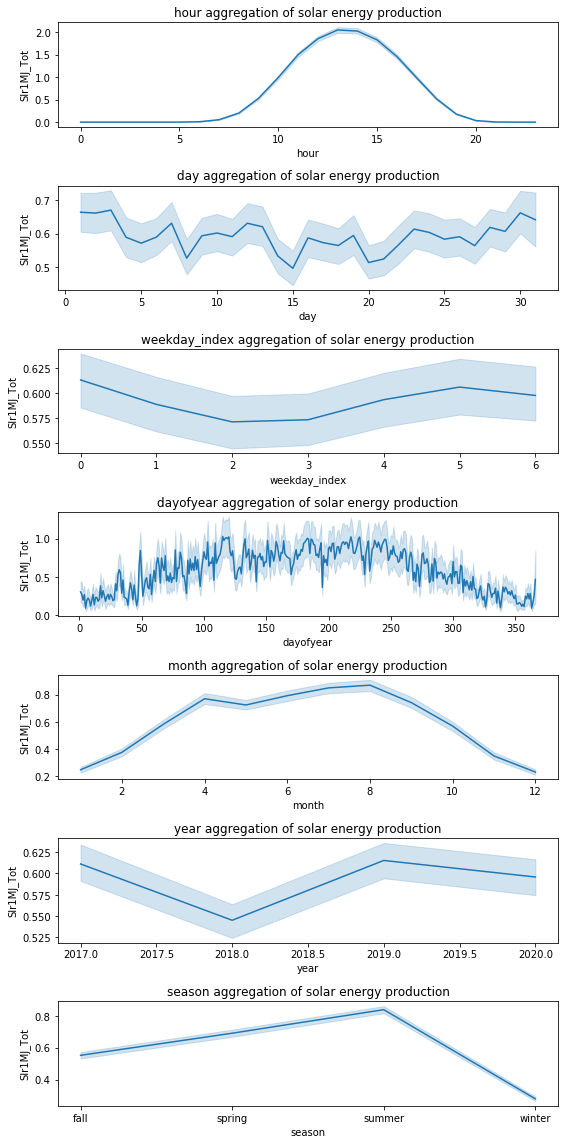

In [9]:
#For ploting Seaborn library lineplot() method used
fig, ax = plt.subplots(len(temporal_features), 1, figsize = (8, 16))
for i,feature in enumerate(temporal_features):
    _ = sns.lineplot(x=feature, 
                    y='Slr1MJ_Tot', 
                    data=last_solar_energy,
                    ax=ax[i]).set_title('%s aggregation of solar energy production' % feature)
plt.tight_layout()

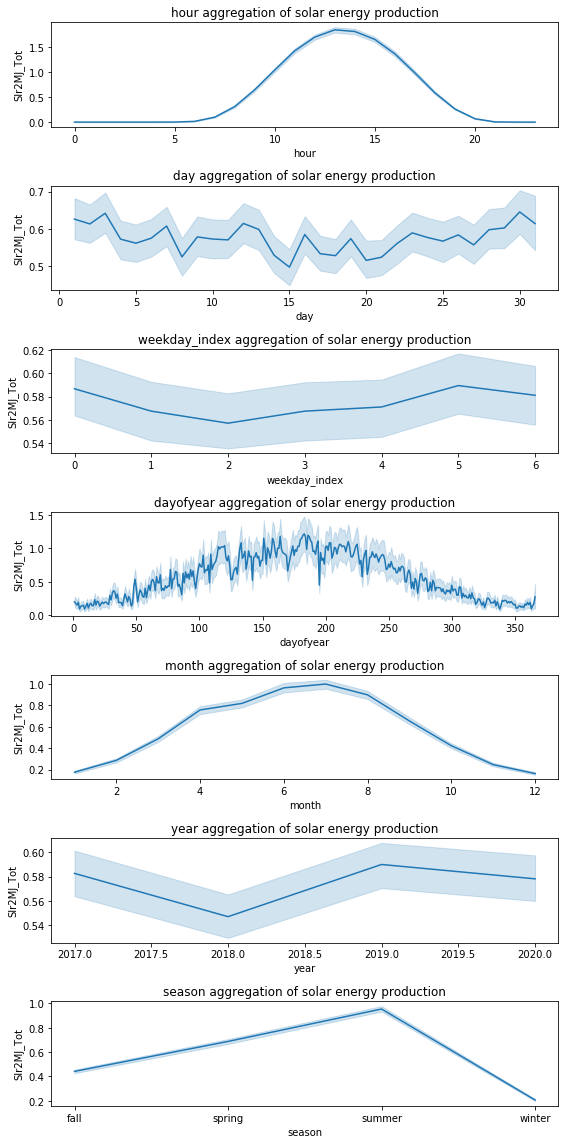

In [10]:
fig, ax = plt.subplots(len(temporal_features), 1, figsize = (8, 16))
for i,feature in enumerate(temporal_features):
    _ = sns.lineplot(x=feature, 
                    y='Slr2MJ_Tot', 
                    data=last_solar_energy,
                    ax=ax[i]).set_title('%s aggregation of solar energy production' % feature)
plt.tight_layout()

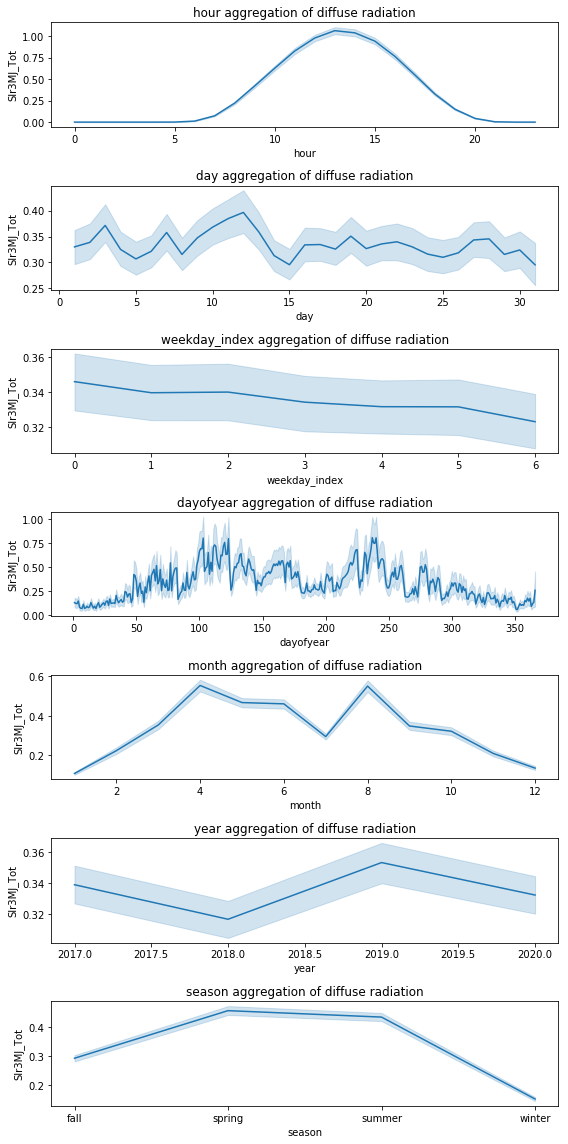

In [11]:
fig, ax = plt.subplots(len(temporal_features), 1, figsize = (8, 16))
for i,feature in enumerate(temporal_features):
    _ = sns.lineplot(x=feature, 
                    y='Slr3MJ_Tot', 
                    data=last_solar_energy,
                    ax=ax[i]).set_title('%s aggregation of diffuse radiation' % feature)
plt.tight_layout()

# Heatmaps

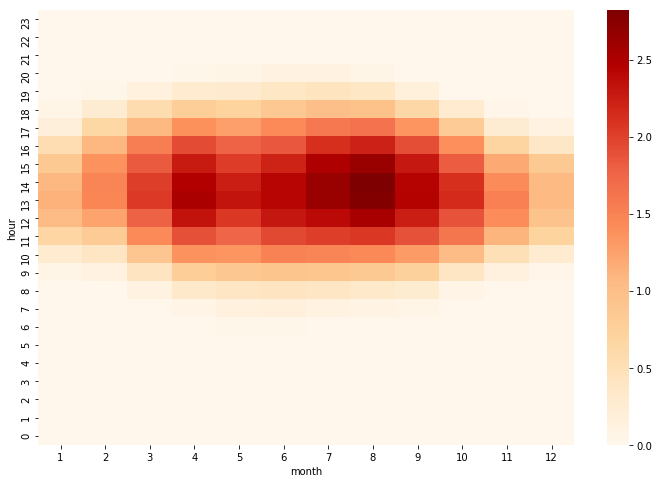

In [12]:
graph= plt.figure(figsize=(12, 8))
#For showing heatmap Seaborn library heatmap() method used
ax = sns.heatmap(last_solar_energy.pivot_table(values='Slr1MJ_Tot',
                                                 index='hour', 
                                                 columns = 'month', 
                                                 aggfunc = 'mean').sort_index(ascending = False),cmap='OrRd')

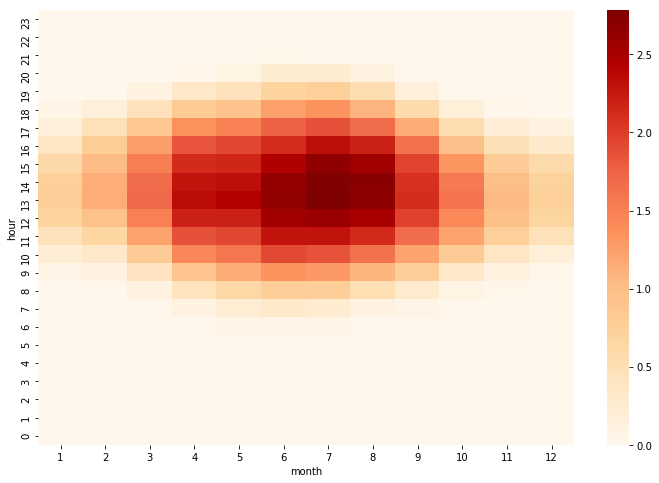

In [13]:
graph= plt.figure(figsize=(12, 8))
ax = sns.heatmap(last_solar_energy.pivot_table(values='Slr2MJ_Tot',
                                                 index='hour', 
                                                 columns = 'month', 
                                                 aggfunc = 'mean').sort_index(ascending = False),cmap='OrRd')

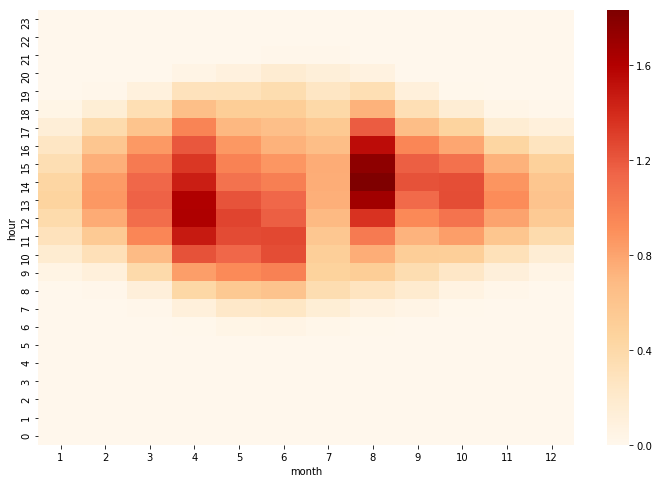

In [14]:
graph= plt.figure(figsize=(12, 8))
ax = sns.heatmap(last_solar_energy.pivot_table(values='Slr3MJ_Tot',
                                                 index='hour', 
                                                 columns = 'month', 
                                                 aggfunc = 'mean').sort_index(ascending = False),cmap='OrRd')

When we compare the heatmaps above, we see that the 3rd panel is not working properly.

In [15]:
#Calculating the yearly avarage energy production per meter square 
Total1 = last_solar_energy['Slr1MJ_Tot'].sum()/4
Total2 = last_solar_energy['Slr2MJ_Tot'].sum()/4
Total3 = last_solar_energy['Slr3MJ_Tot'].sum()/4

print("First Panel Total Solar Energy Yearly Avarage: ",Total1.round(),"MJ/m²")
print("Second Panel Total Solar Energy Yearly Avarage: ",Total2.round(),"MJ/m²")
print("Solar Diffusion Yearly Avarage: ",Total3.round(),"MJ/m²")

First Panel Total Solar Energy Yearly Avarage:  5187.0 MJ/m²
Second Panel Total Solar Energy Yearly Avarage:  5035.0 MJ/m²
Solar Diffusion Yearly Avarage:  2939.0 MJ/m²


In [16]:
#converting MJ/m^2 to W/m^2
#1 Watt per m² = 1 Joule per sec per m²
#days=365.3333333333333 , hours=24 , minutes=60, seconds=60 
J_sec=(Total2*(10**6))/(24 * 60 * 60 * 365.3)
Watt=J_sec
print("This panel avarage produce is",J_sec.round(),"Joule per sec per m²,",Watt.round(),"Watt per m²")

This panel avarage produce is 160.0 Joule per sec per m², 160.0 Watt per m²


In [17]:
last_solar_energy.head()

,Slr1W_Avg,Slr1MJ_Tot,Slr2W_Avg,Slr2MJ_Tot,Slr3W_Avg,Slr3MJ_Tot,hour,month,year,day,dayofyear,weekday_index,season
Time,,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2017,1,1,6,winter
2017-01-01 01:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2017,1,1,6,winter
2017-01-01 02:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,2,1,2017,1,1,6,winter
2017-01-01 03:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,3,1,2017,1,1,6,winter
2017-01-01 04:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2017,1,1,6,winter


# Machine Learning

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import matplotlib.pyplot as plt
from pickle import dump
from pickle import load

# Multiple Linear Regression

In [19]:
X = last_solar_energy.drop(["Slr2MJ_Tot",'season',"Slr1W_Avg","Slr2W_Avg","Slr1MJ_Tot","day","year"], axis=1)
y = last_solar_energy["Slr2MJ_Tot"].ravel()

# Train the regression
lr = LinearRegression()
lr.fit(X,y)

# Test the model
y_pred_1 = lr.predict(X)

# Find the accuracy
accuracy = lr.score(X,y)
print('Accuracy:',accuracy*100,'%')

Accuracy: 57.444378469180776 %


In [20]:
regression_results = pd.DataFrame()

regression_results['Year'] = last_solar_energy['year']
regression_results['Month'] = last_solar_energy['month']
regression_results['Day'] = last_solar_energy['day']
regression_results['Hour'] = last_solar_energy['hour']
regression_results['test'] = y
regression_results['pred'] = y_pred_1

regression_results.head()

,Year,Month,Day,Hour,test,pred
Time,,,,,,
2017-01-01 00:00:00+00:00,2017,1,1,0,0.0,0.115583
2017-01-01 01:00:00+00:00,2017,1,1,1,0.0,0.123934
2017-01-01 02:00:00+00:00,2017,1,1,2,0.0,0.132285
2017-01-01 03:00:00+00:00,2017,1,1,3,0.0,0.140636
2017-01-01 04:00:00+00:00,2017,1,1,4,0.0,0.148986


In [21]:
def model_1(Date):
    day_df = regression_results[Date:Date]
    day_df.reset_index(drop=True, inplace=True)
    plt.plot(day_df['Hour'],day_df['test'], label = 'Actual')
    plt.plot(day_df['Hour'],day_df['pred'], label = 'Predicted')
    plt.ylabel('Slr1MJ_Tot')
    plt.xlabel('Time')
    plt.xticks(day_df['Hour'])
    plt.title(f'İTU energy Output on {Date}')
    plt.legend()
    plt.savefig("solar_linear_regression")
    plt.show()
    return

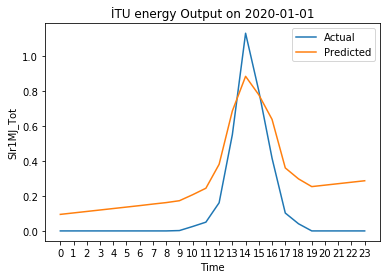

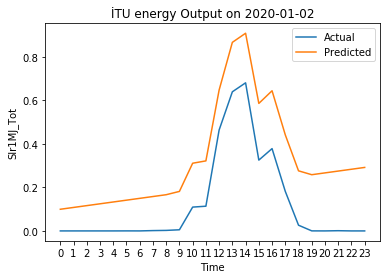

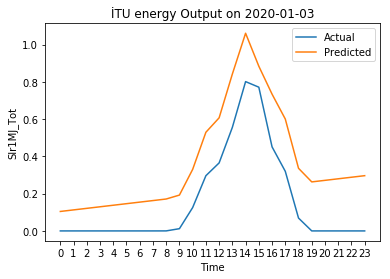

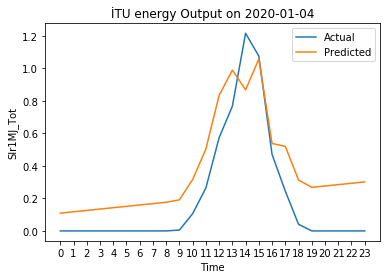

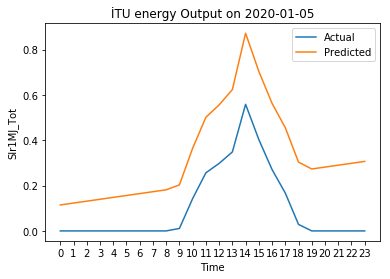

In [22]:
dates=['2020-01-01',"2020-01-02","2020-01-03","2020-01-04","2020-01-05"]
for i in dates:
    model_1(i)

# Neural Network

In [32]:
# Define the features set
#solar_clean_df = solar_clean_df.loc[(solar_clean_df['MWH'] > 0)]

X = last_solar_energy.drop(["Slr2MJ_Tot",'season',"Slr1W_Avg","Slr2W_Avg","Slr1MJ_Tot",'day',"weekday_index","dayofyear"], axis=1)
y = last_solar_energy[["Slr2MJ_Tot",'year']]

#split data into training and testing sets
X_train = X.loc[(X["year"] == 2017) | (X["year"] == 2018) | (X["year"] == 2019)]
X_test  = X.loc[(X["year"] == 2020)]
y_train = y.loc[(X["year"] == 2017) | (X["year"] == 2018) | (X["year"] == 2019)]
y_test  = y.loc[(y["year"] == 2020)]

# drop the year since there is only one
X_train = X_train.drop(["year"], axis=1)
X_test  = X_test.drop(["year"], axis=1)
y_train = y_train.drop(["year"], axis=1)
y_test  = y_test.drop(["year"], axis=1)

# Turn the y data into a list
y_train = y_train['Slr2MJ_Tot'].ravel()
y_test = y_test['Slr2MJ_Tot'].ravel()

# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\yusuf\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yusuf\anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\yusuf\anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


# Train the Model

In [33]:
number_input_features = len(X_train.columns)
hidden_nodes_layer1 =  number_input_features*5
hidden_nodes_layer2 =  number_input_features*4
hidden_nodes_layer3 =  number_input_features*3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="linear"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Compile the Sequential model together and customize metrics
nn.compile(loss='mse', optimizer='sgd', metrics=['mse','mae'])

# print a summary of the model
nn.summary()

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                100       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 653
Trainable params: 653
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
26277/26277 [==============================] - 0s 13us/sample - loss: 0.2652 - mean_squared_error: 0.2652 - mean_absolute_error: 0.2777
Epoch 2/200
26277/26277 [==============================] - 0s 13us/sample - loss: 0.1543 - mean_squared_er

26277/26277 [==============================] - 0s 13us/sample - loss: 0.1125 - mean_squared_error: 0.1125 - mean_absolute_error: 0.1564
Epoch 51/200
26277/26277 [==============================] - 0s 12us/sample - loss: 0.1128 - mean_squared_error: 0.1128 - mean_absolute_error: 0.1559
Epoch 52/200
26277/26277 [==============================] - 0s 12us/sample - loss: 0.1124 - mean_squared_error: 0.1124 - mean_absolute_error: 0.1559
Epoch 53/200
26277/26277 [==============================] - 0s 12us/sample - loss: 0.1124 - mean_squared_error: 0.1124 - mean_absolute_error: 0.1558
Epoch 54/200
26277/26277 [==============================] - 0s 13us/sample - loss: 0.1120 - mean_squared_error: 0.1120 - mean_absolute_error: 0.1552
Epoch 55/200
26277/26277 [==============================] - 0s 13us/sample - loss: 0.1118 - mean_squared_error: 0.1118 - mean_absolute_error: 0.1550
Epoch 56/200
26277/26277 [==============================] - 0s 13us/sample - loss: 0.1121 - mean_squared_error: 0.1121 

26277/26277 [==============================] - 0s 12us/sample - loss: 0.1097 - mean_squared_error: 0.1097 - mean_absolute_error: 0.1516
Epoch 106/200
26277/26277 [==============================] - 0s 13us/sample - loss: 0.1097 - mean_squared_error: 0.1097 - mean_absolute_error: 0.1517
Epoch 107/200
26277/26277 [==============================] - 0s 13us/sample - loss: 0.1099 - mean_squared_error: 0.1099 - mean_absolute_error: 0.1517
Epoch 108/200
26277/26277 [==============================] - 0s 12us/sample - loss: 0.1096 - mean_squared_error: 0.1096 - mean_absolute_error: 0.1510
Epoch 109/200
26277/26277 [==============================] - 0s 12us/sample - loss: 0.1097 - mean_squared_error: 0.1097 - mean_absolute_error: 0.1515
Epoch 110/200
26277/26277 [==============================] - 0s 13us/sample - loss: 0.1096 - mean_squared_error: 0.1096 - mean_absolute_error: 0.1511
Epoch 111/200
26277/26277 [==============================] - 0s 12us/sample - loss: 0.1098 - mean_squared_error: 0

26277/26277 [==============================] - 0s 12us/sample - loss: 0.1088 - mean_squared_error: 0.1088 - mean_absolute_error: 0.1496
Epoch 160/200
26277/26277 [==============================] - 0s 13us/sample - loss: 0.1087 - mean_squared_error: 0.1087 - mean_absolute_error: 0.1499
Epoch 161/200
26277/26277 [==============================] - 0s 12us/sample - loss: 0.1085 - mean_squared_error: 0.1085 - mean_absolute_error: 0.1498
Epoch 162/200
26277/26277 [==============================] - 0s 12us/sample - loss: 0.1084 - mean_squared_error: 0.1084 - mean_absolute_error: 0.1496
Epoch 163/200
26277/26277 [==============================] - 0s 13us/sample - loss: 0.1086 - mean_squared_error: 0.1086 - mean_absolute_error: 0.1498
Epoch 164/200
26277/26277 [==============================] - 0s 13us/sample - loss: 0.1085 - mean_squared_error: 0.1085 - mean_absolute_error: 0.1493
Epoch 165/200
26277/26277 [==============================] - 0s 12us/sample - loss: 0.1085 - mean_squared_error: 0

In [34]:
# Predict values for test set
y_pred_2 = nn.predict(X_test_scaled)

# Create dataframe for results
nn_results = pd.DataFrame()

nn_results['Year'] = last_solar_energy['year'].loc[(last_solar_energy['year'] == 2020)]
nn_results['Month'] = last_solar_energy['month'].loc[(last_solar_energy['year'] == 2020)]
nn_results['Day'] = last_solar_energy['day'].loc[(last_solar_energy['year'] == 2020)]
nn_results['Hour'] = last_solar_energy['hour'].loc[(last_solar_energy['year'] == 2020)]
nn_results['test'] = y_test
nn_results['pred'] = y_pred_2

nn_results.head()

,Year,Month,Day,Hour,test,pred
Time,,,,,,
2020-01-01 00:00:00+00:00,2020,1,1,0,0.000000,0.0
2020-01-01 01:00:00+00:00,2020,1,1,1,0.000000,0.0
2020-01-01 02:00:00+00:00,2020,1,1,2,0.000017,0.0
2020-01-01 03:00:00+00:00,2020,1,1,3,0.000000,0.0
2020-01-01 04:00:00+00:00,2020,1,1,4,0.000000,0.0


In [35]:
# Graph the prediction vs actual (Orange is prediction)
def model_2(Date):
    day_df = nn_results[Date:Date]
    day_df.reset_index(drop=True, inplace=True)
    plt.plot(day_df['Hour'],day_df['test'], label = 'Actual')
    plt.plot(day_df['Hour'],day_df['pred'], label = 'Predicted')
    plt.ylabel('Slr2MJ_Tot')
    plt.xlabel('Time')
    plt.xticks(day_df['Hour'])
    plt.title(f'ITU Slr2MJ_Tot Output on {Date}')
    plt.legend()
    plt.savefig('solar_neural_network')
    plt.show()

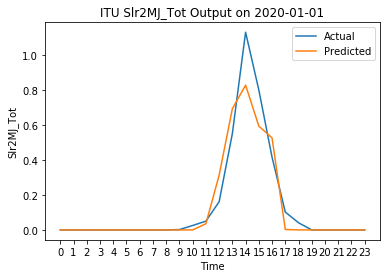

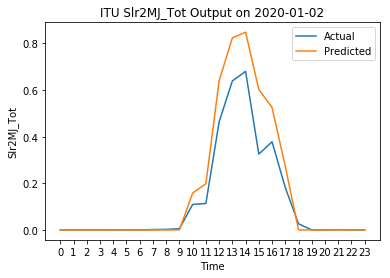

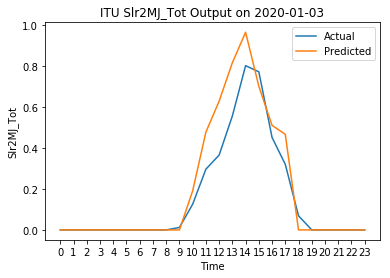

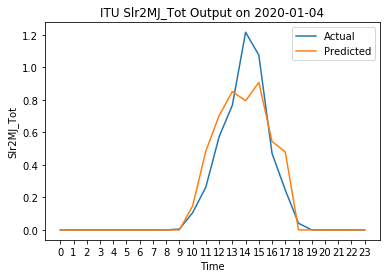

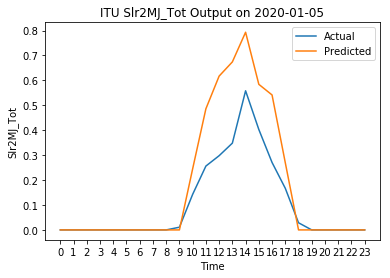

In [36]:
dates=['2020-01-01',"2020-01-02","2020-01-03","2020-01-04","2020-01-05"]
for i in dates:
    model_2(i)

# Total Energy Production 

Calculation of the average annual total energy amount to be obtained from the PV panels planned to be placed on the Faculty of Science and Letters of Istanbul Technical University.

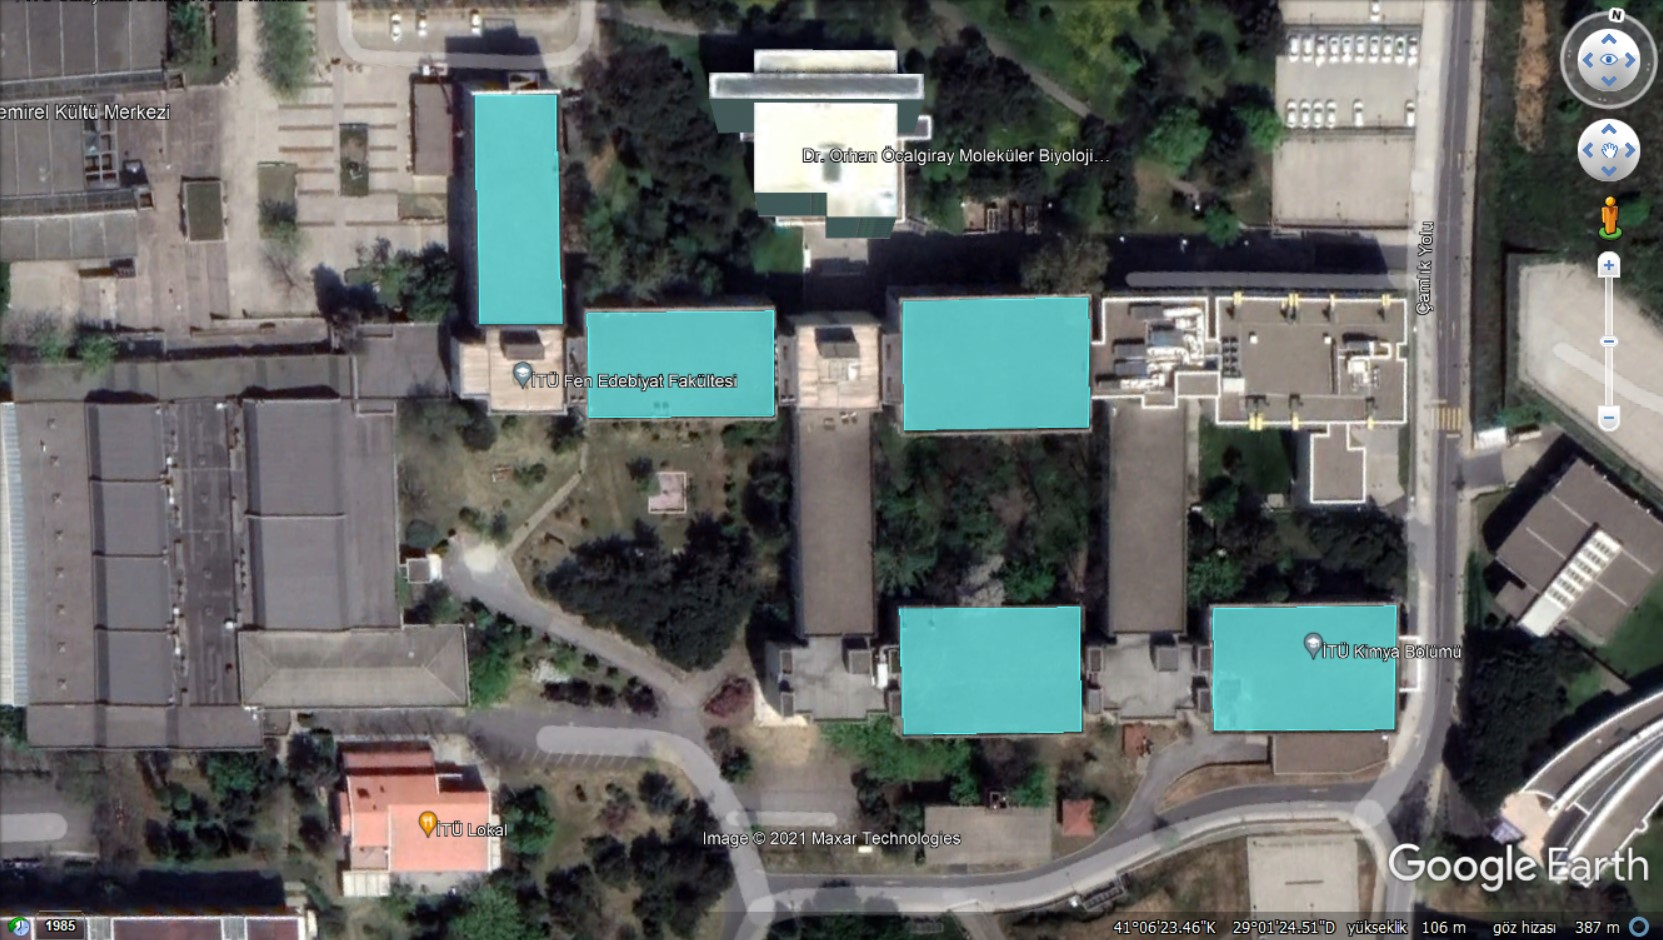

In [38]:
#İstanbul Technical University Science and Letters Faculty Buildings and it's roofs
display.Image("./Febs.jpg")

Areas of roofs from left to right 652 m^2, 692 m^2, 835 m^2,843 m^2, 806 m^2. Total Area=3828 m^2

In [44]:
#calculation of solar energy for all roof area
Area=3828
Energy_production=Total2*Area
print("Yearly total energy production is {} Mj or {} kWh".format(Energy_production.round(),(Energy_production*0.277778).round()))
print()

Yearly total energy production is 19273814.0 Mj or 5353841.0 kWh

